#### Step 1: Load the Data

In [1]:
# Import Necessary Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
crop_data = pd.read_csv('crop_production.csv')

In [2]:
# Display the first few rows of the dataset
print(crop_data.head())

                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  


#### Step 2: Data Cleaning

In [3]:
# Check for missing values
print(crop_data.isnull().sum())

# Function to impute missing production values
def impute_production(row):
    if pd.isnull(row['Production']):
        # Try to find the median value at the most granular level
        median_value = crop_data[(crop_data['State_Name'] == row['State_Name']) &
                                 (crop_data['District_Name'] == row['District_Name']) &
                                 (crop_data['Crop'] == row['Crop']) &
                                 (crop_data['Season'] == row['Season'])]['Production'].median()
        if pd.isnull(median_value):
            # If no median value is found, try at a higher level of aggregation
            median_value = crop_data[(crop_data['State_Name'] == row['State_Name']) &
                                     (crop_data['Crop'] == row['Crop']) &
                                     (crop_data['Season'] == row['Season'])]['Production'].median()
        if pd.isnull(median_value):
            # If still no median value is found, try at the state and crop level
            median_value = crop_data[(crop_data['State_Name'] == row['State_Name']) &
                                     (crop_data['Crop'] == row['Crop'])]['Production'].median()
        return median_value
    else:
        return row['Production']

# Apply the imputation function
crop_data['Production'] = crop_data.apply(impute_production, axis=1)

# Verify if all missing values are imputed
print(crop_data.isnull().sum())

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


C:\Users\administor\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\administor\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\administor\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\administor\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\administor\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keep

State_Name         0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area               0
Production       238
dtype: int64


#### Step 3: Exploratory Data Analysis (EDA) 

In [4]:
# Summary of the dataset
print(crop_data.describe(include='all'))

           State_Name District_Name      Crop_Year       Season    Crop  \
count          246091        246091  246091.000000       246091  246091   
unique             33           646            NaN            6     124   
top     Uttar Pradesh       BIJAPUR            NaN  Kharif         Rice   
freq            33306           945            NaN        95951   15104   
mean              NaN           NaN    2005.643018          NaN     NaN   
std               NaN           NaN       4.952164          NaN     NaN   
min               NaN           NaN    1997.000000          NaN     NaN   
25%               NaN           NaN    2002.000000          NaN     NaN   
50%               NaN           NaN    2006.000000          NaN     NaN   
75%               NaN           NaN    2010.000000          NaN     NaN   
max               NaN           NaN    2015.000000          NaN     NaN   

                Area    Production  
count   2.460910e+05  2.458530e+05  
unique           NaN     

#### i. Distribution of Numeric Data

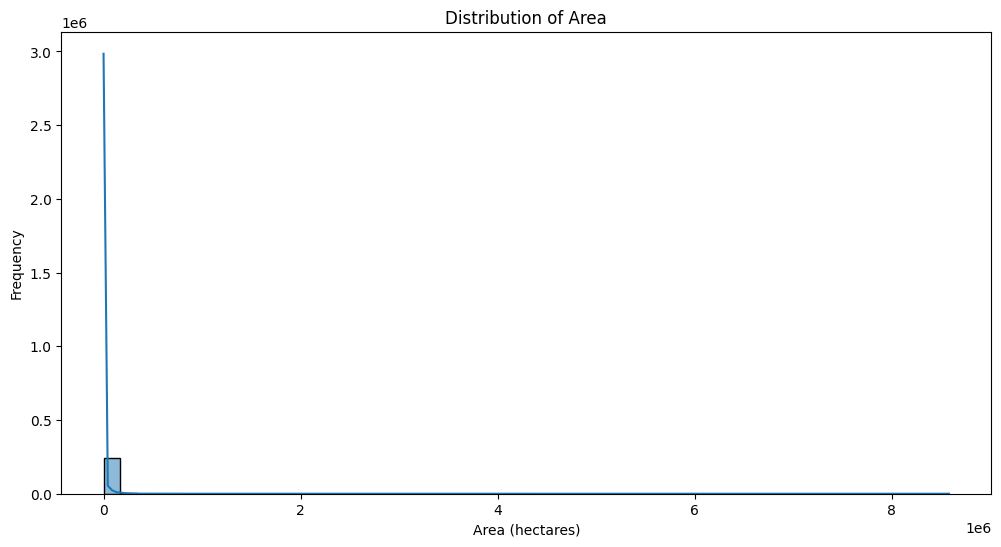

In [5]:
# Distribution of Area
plt.figure(figsize=(12, 6))
sns.histplot(crop_data['Area'], bins=50, kde=True)
plt.title('Distribution of Area')
plt.xlabel('Area (hectares)')
plt.ylabel('Frequency')
plt.show()

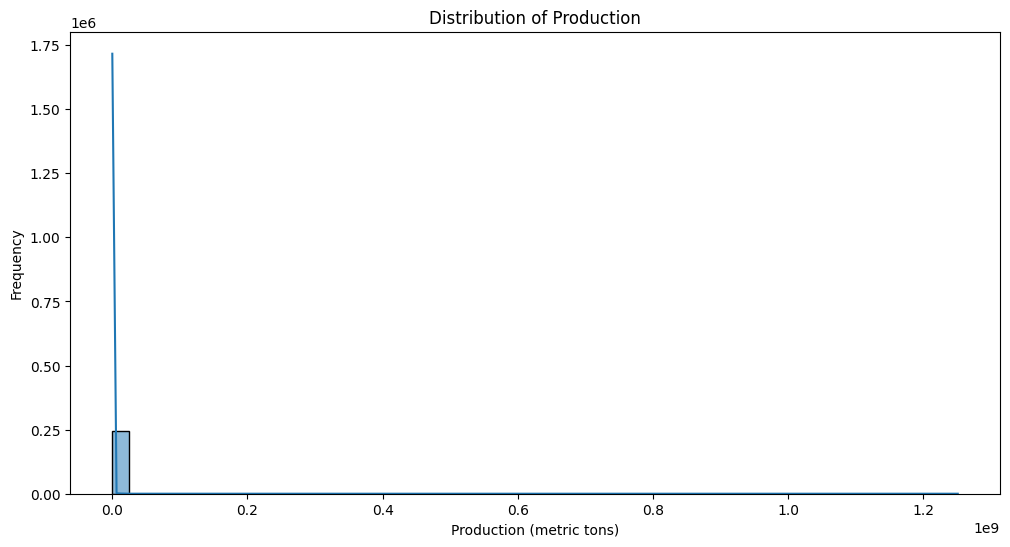

In [6]:
# Distribution of Production
plt.figure(figsize=(12, 6))
sns.histplot(crop_data['Production'], bins=50, kde=True)
plt.title('Distribution of Production')
plt.xlabel('Production (metric tons)')
plt.ylabel('Frequency')
plt.show()

#### ii. Distribution of Categorical Data

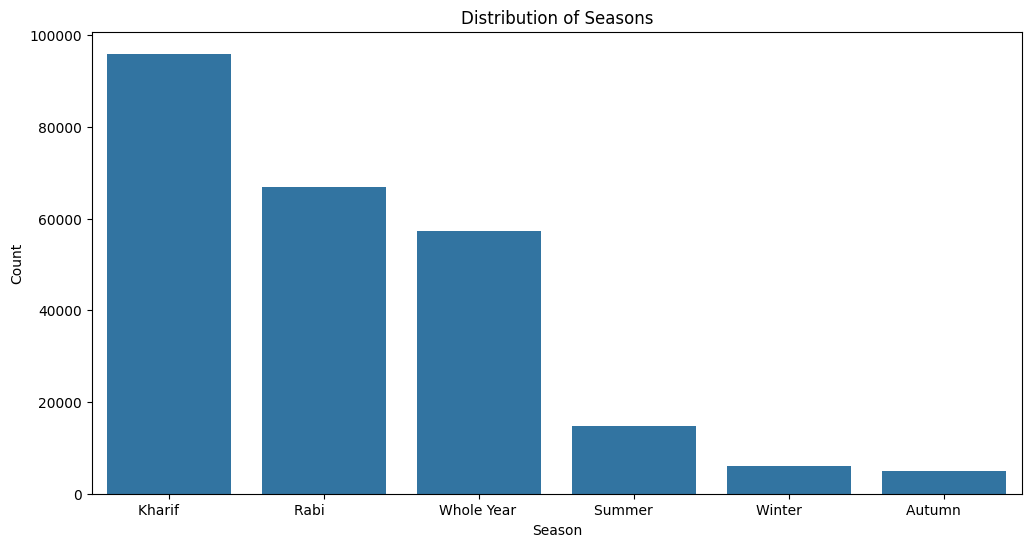

In [7]:
# Count plot for Season
plt.figure(figsize=(12, 6))
sns.countplot(data=crop_data, x='Season', order=crop_data['Season'].value_counts().index)
plt.title('Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

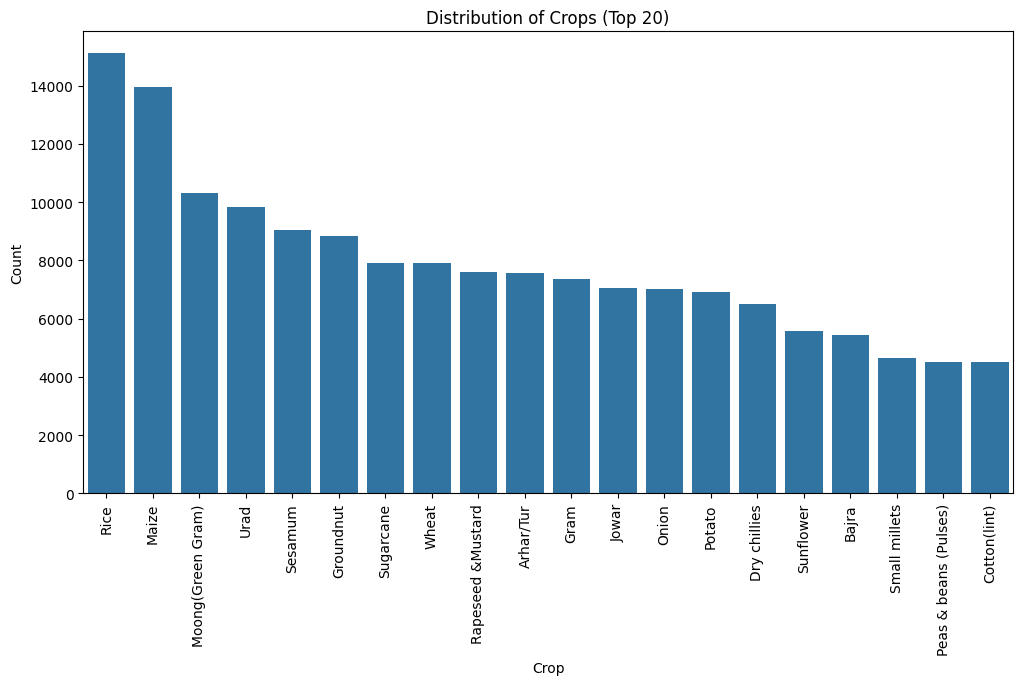

In [8]:
# Count plot for Crop
plt.figure(figsize=(12, 6))
sns.countplot(data=crop_data, x='Crop', order=crop_data['Crop'].value_counts().index[:20])  # Top 20 crops for better visualization
plt.xticks(rotation=90)
plt.title('Distribution of Crops (Top 20)')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.show()

#### iii. Trend Analysis

C:\Users\administor\AppData\Local\Temp\ipykernel_2064\179870859.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=crop_data, x='Crop_Year', y='Production', ci=None)


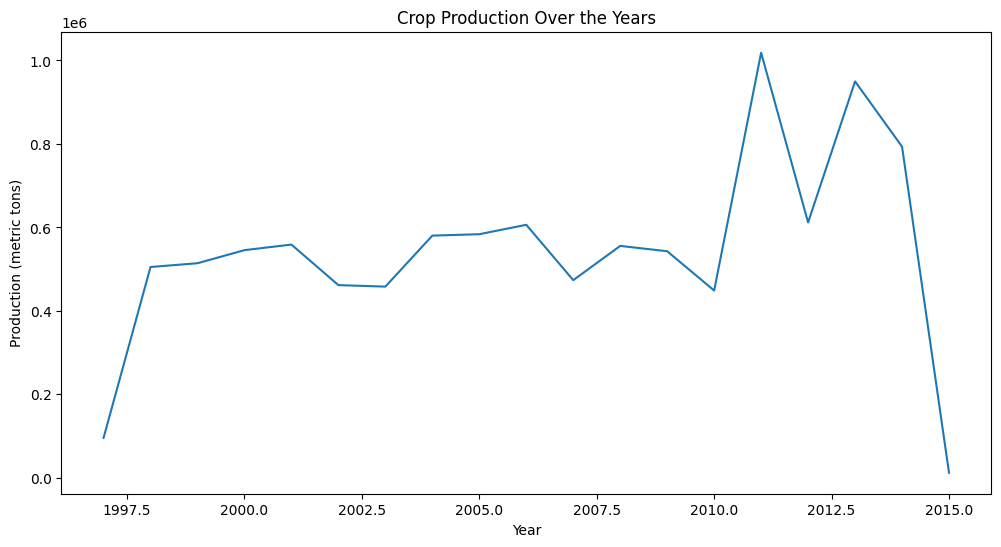

In [9]:
# Crop production over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=crop_data, x='Crop_Year', y='Production', ci=None)
plt.title('Crop Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Production (metric tons)')
plt.show()

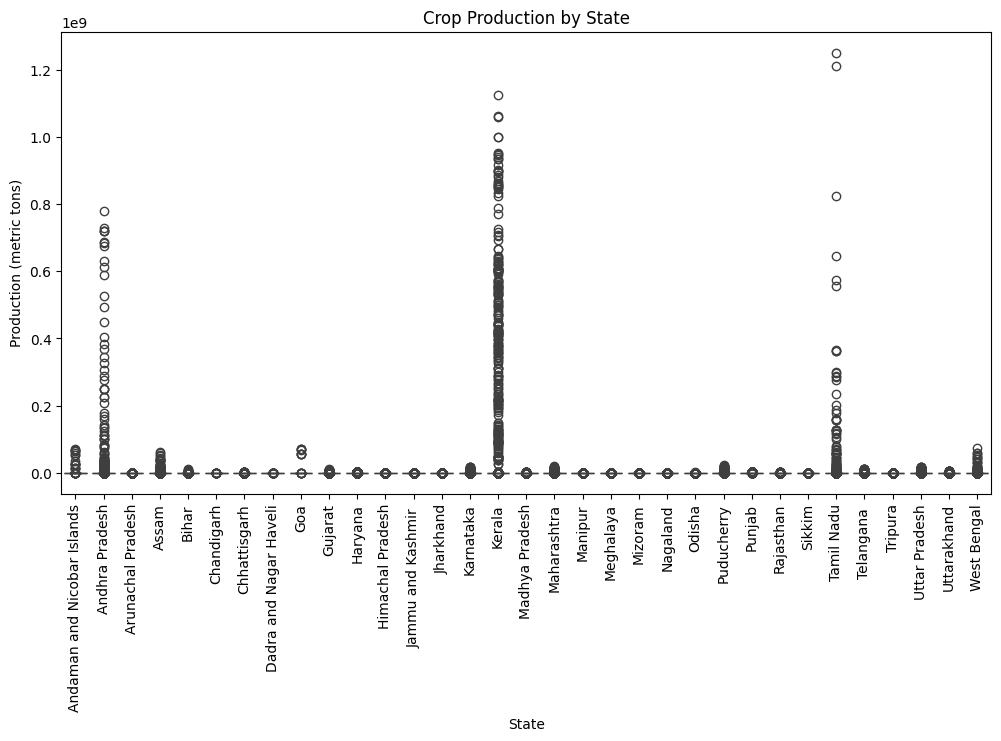

In [10]:
# Crop production by state
plt.figure(figsize=(12, 6))
sns.boxplot(data=crop_data, x='State_Name', y='Production')
plt.xticks(rotation=90)
plt.title('Crop Production by State')
plt.xlabel('State')
plt.ylabel('Production (metric tons)')
plt.show()

#### iv. Correlation Analysis

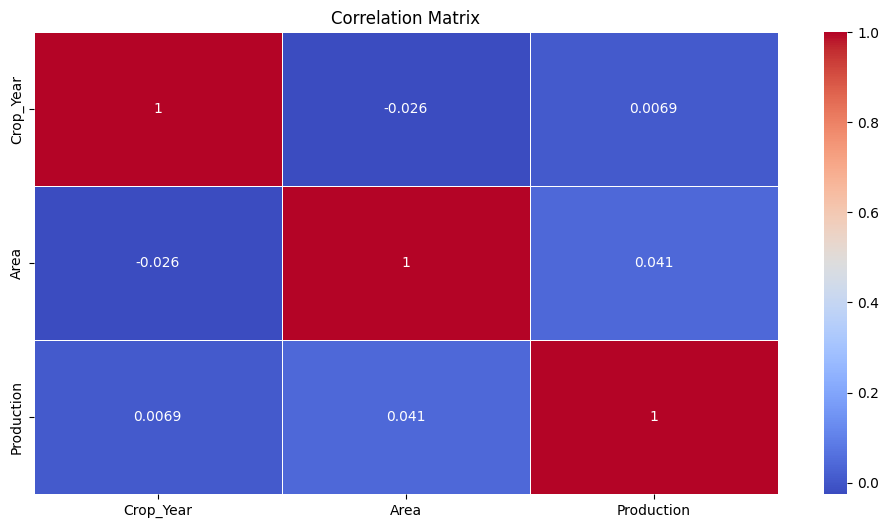

In [11]:
# Filter numeric columns only
numeric_data = crop_data.select_dtypes(include=[np.number])

# Correlation matrix
corr_matrix = numeric_data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Step 4 : Detailed Analysis

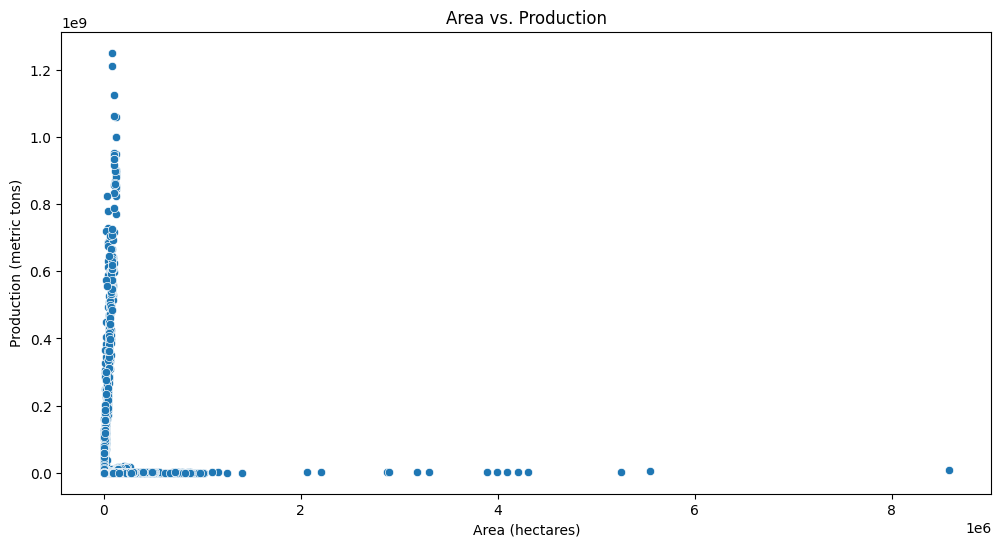

In [12]:
# Scatter plot of Area vs. Production
plt.figure(figsize=(12, 6))
sns.scatterplot(data=crop_data, x='Area', y='Production')
plt.title('Area vs. Production')
plt.xlabel('Area (hectares)')
plt.ylabel('Production (metric tons)')
plt.show()

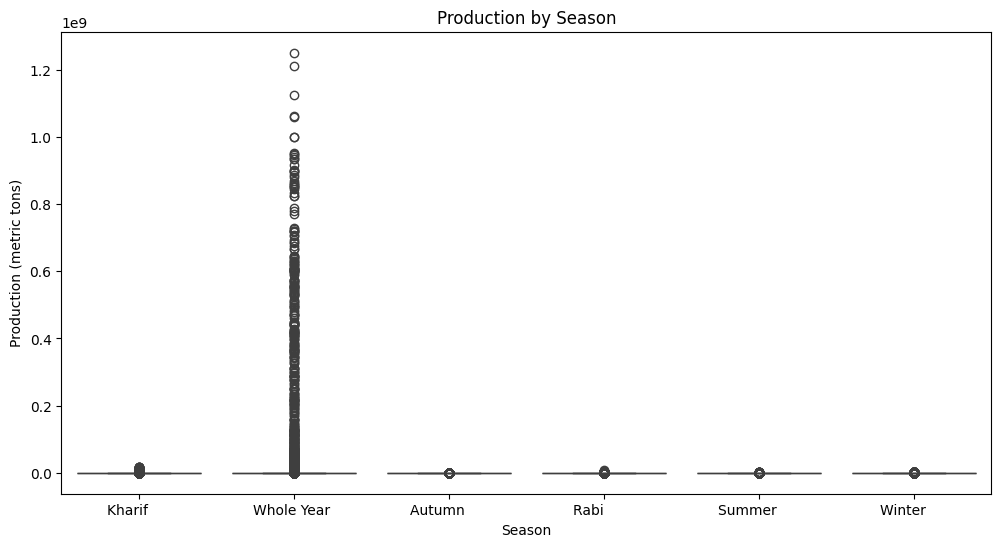

In [13]:
# Box plot of Production by Season
plt.figure(figsize=(12, 6))
sns.boxplot(data=crop_data, x='Season', y='Production')
plt.title('Production by Season')
plt.xlabel('Season')
plt.ylabel('Production (metric tons)')
plt.show()

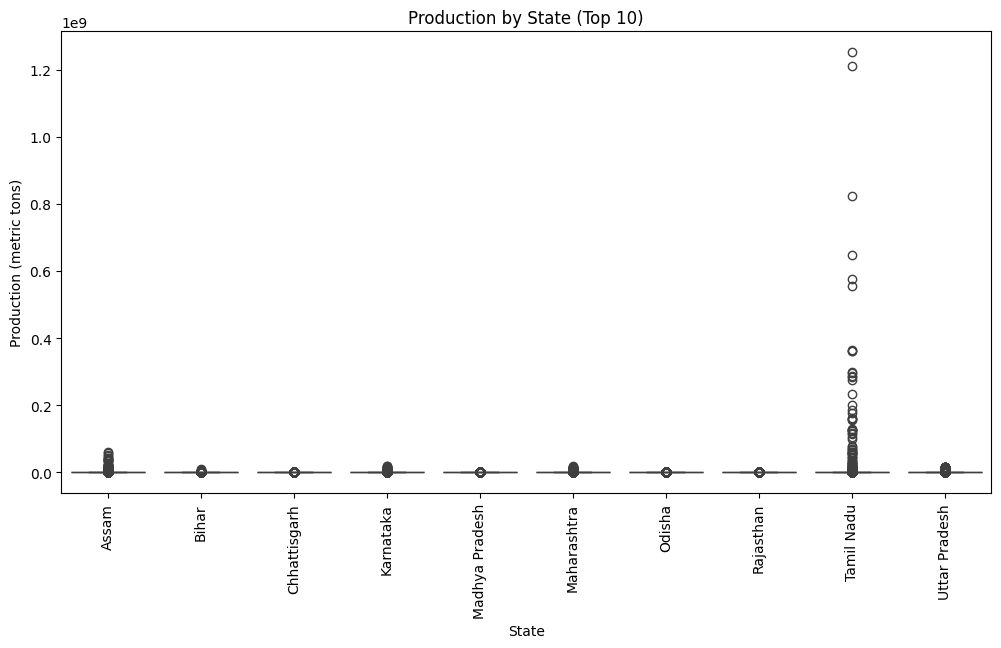

In [14]:
# Box plot of Production by State (Top 10 States)
top_states = crop_data['State_Name'].value_counts().index[:10]
plt.figure(figsize=(12, 6))
sns.boxplot(data=crop_data[crop_data['State_Name'].isin(top_states)], x='State_Name', y='Production')
plt.xticks(rotation=90)
plt.title('Production by State (Top 10)')
plt.xlabel('State')
plt.ylabel('Production (metric tons)')
plt.show()

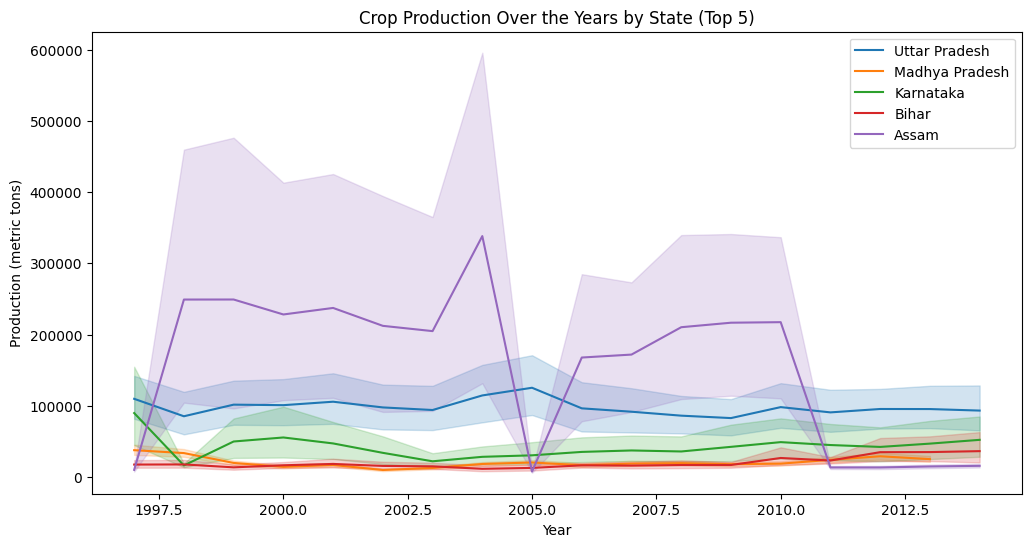

In [15]:
# Crop production by state over the years (Top 5 States)
top_states = crop_data['State_Name'].value_counts().index[:5]
plt.figure(figsize=(12, 6))
for state in top_states:
    state_data = crop_data[crop_data['State_Name'] == state]
    sns.lineplot(data=state_data, x='Crop_Year', y='Production', label=state)
plt.title('Crop Production Over the Years by State (Top 5)')
plt.xlabel('Year')
plt.ylabel('Production (metric tons)')
plt.legend()
plt.show()

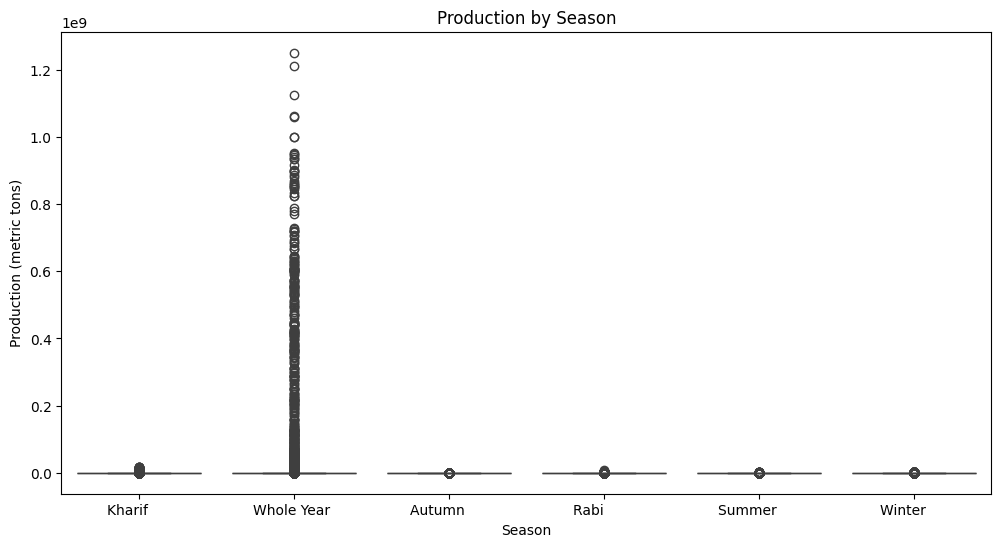

In [16]:
# Box plot of Production by Season
plt.figure(figsize=(12, 6))
sns.boxplot(data=crop_data, x='Season', y='Production')
plt.title('Production by Season')
plt.xlabel('Season')
plt.ylabel('Production (metric tons)')
plt.show()

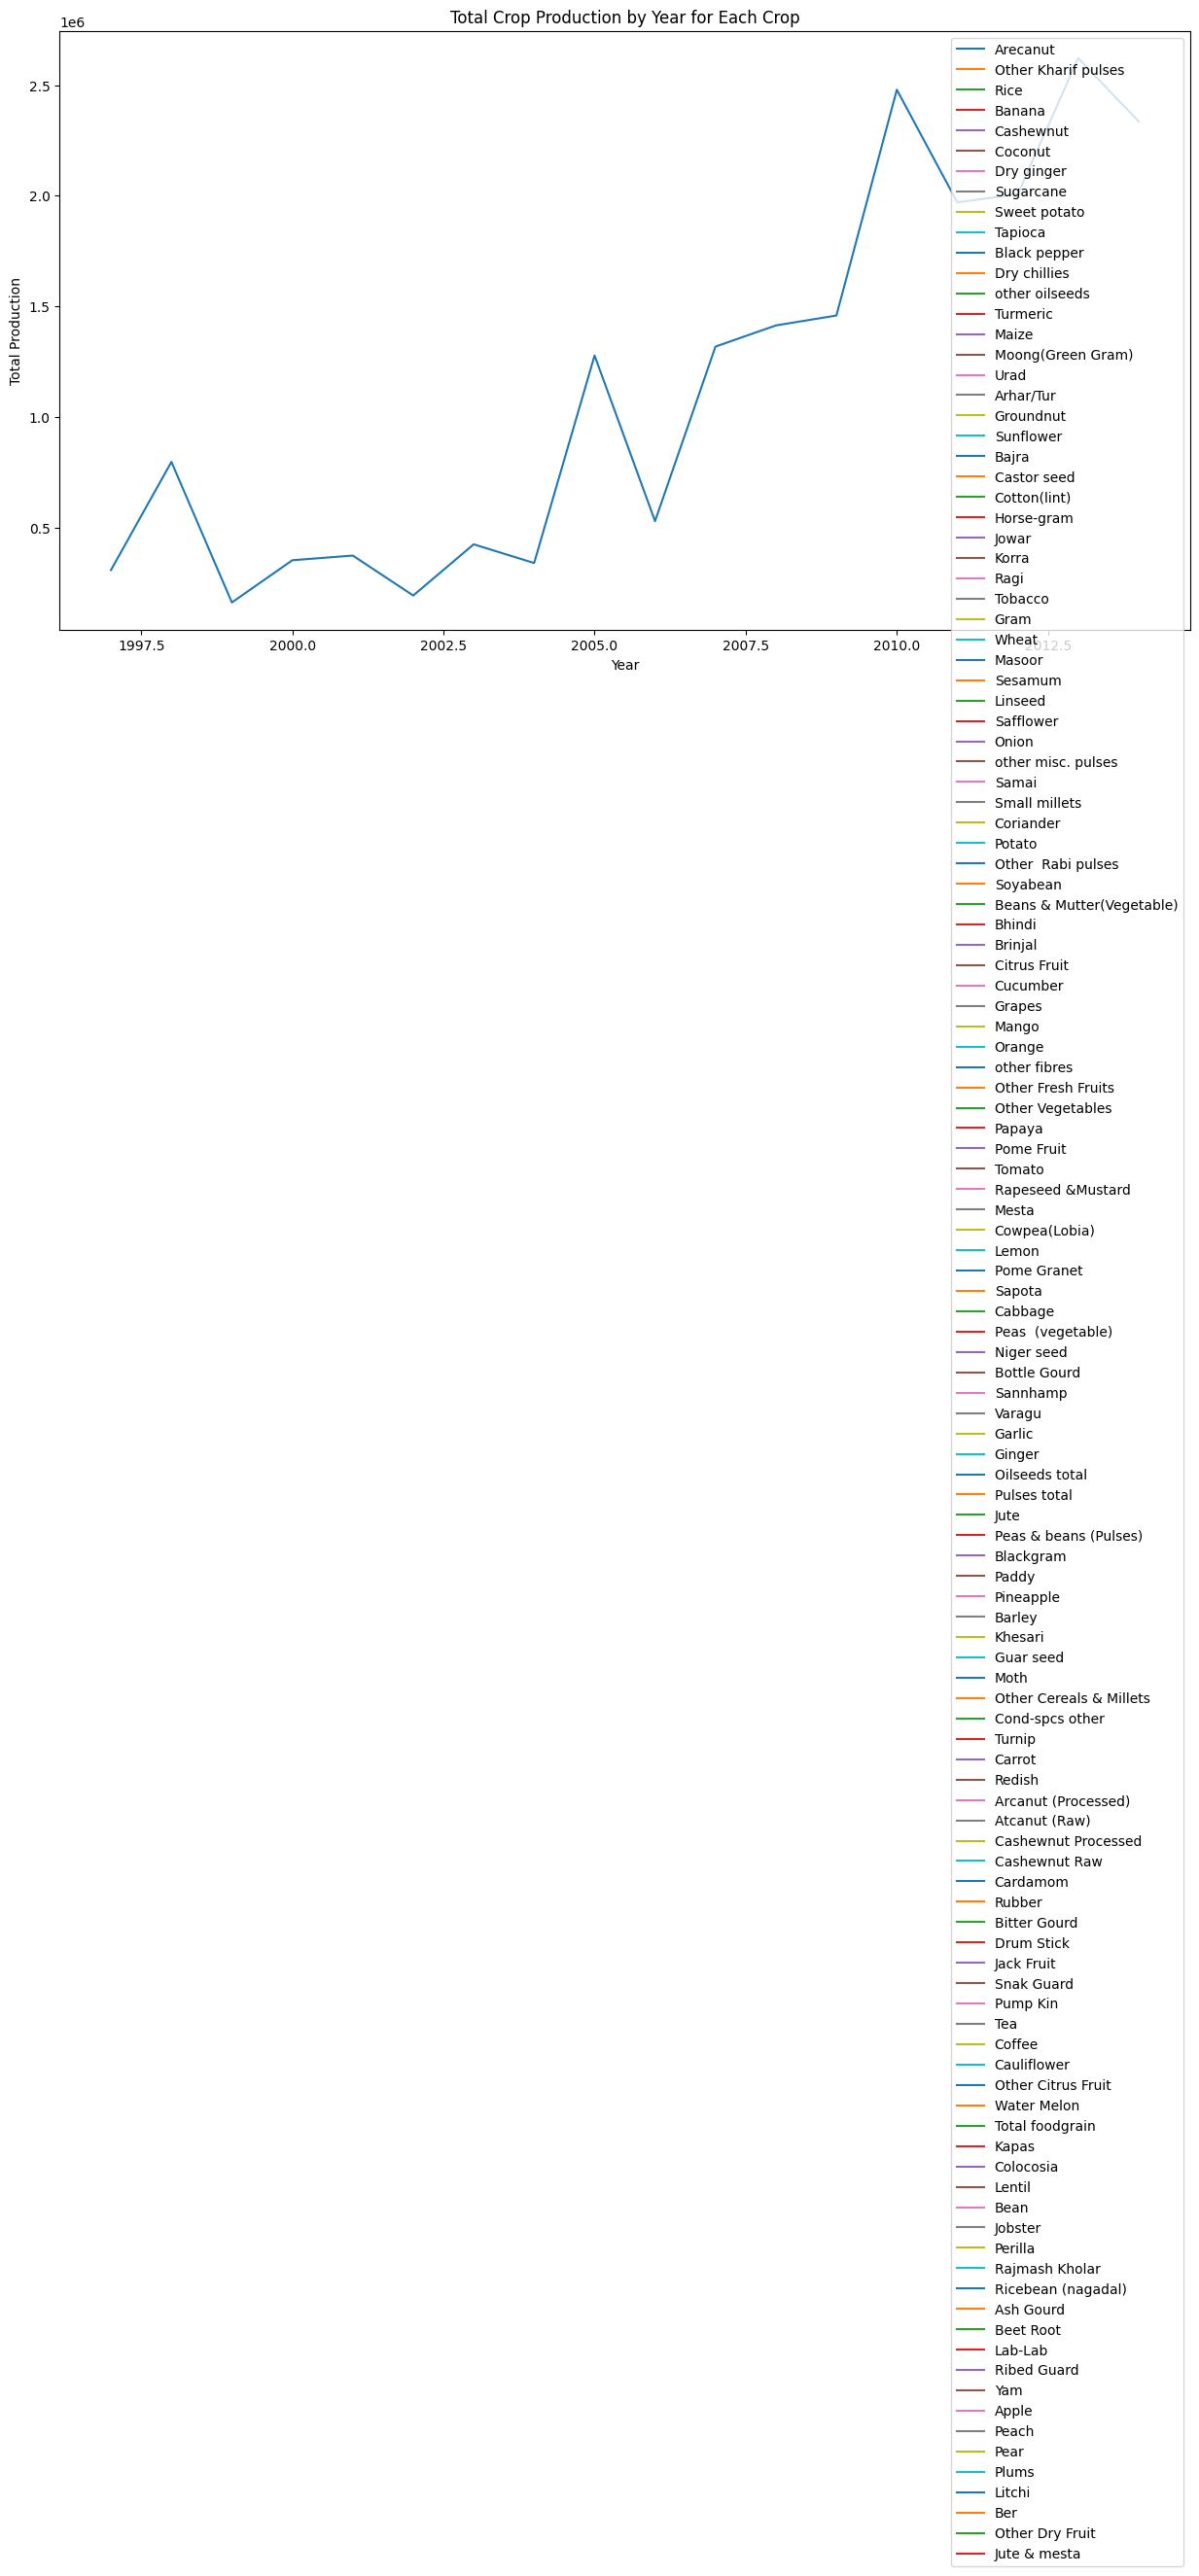

In [17]:
# Total production by year for each crop
plt.figure(figsize=(15, 8))
for crop in crop_data['Crop'].unique():
    crop_data = crop_data[crop_data['Crop'] == crop]
    crop_data.groupby('Crop_Year')['Production'].sum().plot(label=crop)

plt.title('Total Crop Production by Year for Each Crop')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.legend()
plt.show()